##Final model on MobileNetV2

###Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# root_path='/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/Images'

###Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from pathlib import Path
import glob
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

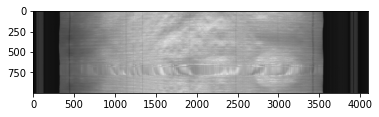

In [ ]:
#Check path is correct or not
img = cv2.imread("/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/Images/000003.png", cv2.IMREAD_COLOR)
plt.imshow(img)

###It is used to store data in python list 

In [ ]:
image = []                  # used to store image data /content/gdrive/MyDrive/Object_detection/Data/train/images/img1.jpeg
img_label = []  
           # used to store image label
for i in range(1,500):
    j='img'+str(i)+'.jpeg'
    if ((Path.cwd() / "/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Object_detection/Data/train/images" / j).exists() == True):         # check if image exists or not
        img = cv2.imread("/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Object_detection/Data/train/images/" + j, cv2.IMREAD_COLOR)       # read image using opencv 
        img = cv2.resize(img, (224,224))                                                                   #resize image 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)                                                                 #resize image 
        img_label.append(1)
        image.append(img) 
    else:
        pass

In [ ]:
len(image), len(img_label)

(499, 499)

##Read a dataframe and then concatenate previous images in them

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/Train_DefectType_PrithviAI.csv")

In [ ]:
df.head()

,images id,defect_flag
0,000001.png,0
1,000002.png,0
2,000003.png,1
3,000004.png,0
4,000005.png,1


In [ ]:
df.rename(columns={"images id": "images_id"}, inplace = True)
df.head()

,images_id,defect_flag
0,000001.png,0
1,000002.png,0
2,000003.png,1
3,000004.png,0
4,000005.png,1


###Concatenate images in python list from dataframe

In [ ]:
# image = []                  # used to store image data
# img_label = []  
# defect=0
# good=0            # used to store image label
for i in df["images_id"]:
    if ((Path.cwd() / "/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/Images" / i).exists() == True):         # check if image exists or not
        img = cv2.imread("/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/Images/" + i, cv2.IMREAD_COLOR)       # read image using opencv 
        img = cv2.resize(img, (224,224))                                                                   #resize image 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img_label.append(df.loc[df["images_id"] == i, "defect_flag"].iloc[0])
        image.append(img) 
    else:
        pass

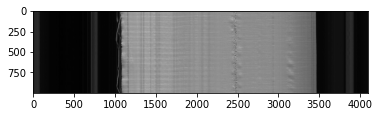

In [ ]:
img = cv2.imread("/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Object_detection/Data_/train/images/img817.jpeg", cv2.IMREAD_COLOR)
plt.imshow(img)

In [ ]:
#Read different 900 images from another location and add all the images in final python list
for i in range(1,900):
    j='img'+str(i)+'.jpeg'
    if ((Path.cwd() / "/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Object_detection/Data_/train/images" / j).exists() == True):         # check if image exists or not
        img = cv2.imread("/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Object_detection/Data_/train/images/" + j, cv2.IMREAD_COLOR)       # read image using opencv 
        img = cv2.resize(img, (224,224))                                                                   #resize image 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)                                                                 #resize image 
        img_label.append(1)
        image.append(img) 
    else:
        pass

In [ ]:
#total number of original training images
len(image)

4668

In [ ]:
len(img_label)

4668

In [ ]:
#convert into numpy array
image=np.array(image)
img_label=np.array(img_label)

###Visualize the plot of number of training data

(array([2658.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2010.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

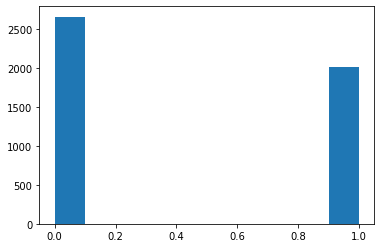

In [ ]:
plt.hist(img_label)

In [ ]:
img_label.sum()

2010

In [ ]:
print(image.shape)
print(image.shape[1])
print(image.shape[2])
f = (image.shape[0], image.shape[2])
print(f)

(4668, 224, 224, 3)
224
224
(4668, 224)


In [ ]:
# df = pd.DataFrame(list(zip(image, img_label)),columns =['Image','label'])
# df.head()

In [ ]:
# df.shape

In [ ]:
# df.to_csv("final.csv", index = False)

In [ ]:
# plt.imshow(df["Image"][0])

In [ ]:
# plt.imshow(df["Image"][2])

In [ ]:
#split dataset into 80 % training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image, img_label, test_size = 0.2, random_state = 100)

In [ ]:
# x_trained = np.array(x_train)
# y_trained = np.array(y_train)
# x_tested = np.array(x_test)
# y_tested = np.array(y_test)

(array([2124.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1610.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

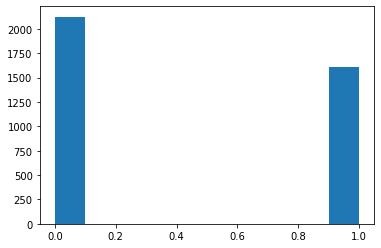

In [ ]:
plt.hist(y_train)

In [ ]:
y_train.shape

(3734,)

(array([534.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 400.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

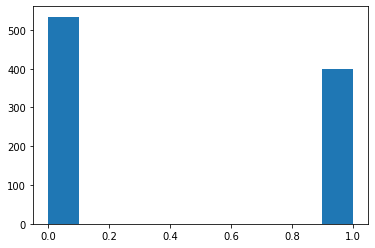

In [ ]:
#visualize the plot of testing data
plt.hist(y_test)

In [ ]:
#Make a dataframe by concatenating all the numpy array
df1 = pd.DataFrame(list(zip(x_train, y_train)),columns =['Image','label'])
df1.head()

,Image,label
0,"[[[57, 57, 57], [49, 49, 49], [52, 52, 52], [5...",0
1,"[[[54, 54, 54], [48, 48, 48], [54, 54, 54], [5...",0
2,"[[[44, 44, 44], [56, 56, 56], [55, 55, 55], [5...",0
3,"[[[12, 12, 12], [15, 15, 15], [54, 54, 54], [4...",0
4,"[[[8, 8, 8], [7, 7, 7], [7, 7, 7], [5, 5, 5], ...",1


##Applied different data-augmentation techniques and try to make balance training samples 

In [ ]:
a_f=[]
a_level=[]
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
defect=1200
non_defect=500
for i in range(len(x_train)):
  if(df1["label"][i]==1 and defect>0):
    augmented_image = data_augmentation(df1["Image"][i])
    a_f.append(augmented_image)
    a_level.append(df1["label"][i])
    defect-=1;
  elif(df1["label"][i]==0 and non_defect>0):
    augmented_image = data_augmentation(df1["Image"][i])
    a_f.append(augmented_image)
    a_level.append(df1["label"][i])
    non_defect-=1;

In [ ]:
len(a_f), len(a_level)

(1700, 1700)

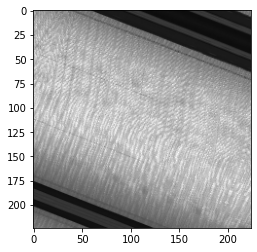

In [ ]:
plt.imshow(a_f[1])

###Added approx 700 blur images

In [ ]:
for i in range(len(x_train)//5):
  x = cv2.blur(np.array(df1["Image"][i]), (3,3))
  a_f.append(x)
  a_level.append(df1["label"][i])

In [ ]:
len(a_f), len(a_level)

(2446, 2446)

In [ ]:
final_train_image = np.array(a_f)
final_train_label = np.array(a_level)

In [ ]:
final_train_image = np.concatenate((final_train_image, x_train), axis=0)
final_train_label = np.concatenate((final_train_label, y_train), axis=0)

In [ ]:
final_train_image.shape, final_train_label.shape

((6180, 224, 224, 3), (6180,))

In [ ]:
#scale data
x_train_scaled = []
for i in range(len(final_train_image)):
    x_train_scaled.append(final_train_image[i]/255.0)
    
x_test_scaled = []
for i in range(len(x_test)):
    x_test_scaled.append(x_test[i]/255.0)

In [ ]:
final_train_image=np.array(x_train_scaled)

In [ ]:
final_train_image.shape, final_train_label.shape

((6180, 224, 224, 3), (6180,))

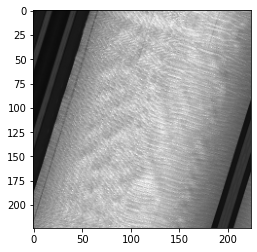

In [ ]:
plt.imshow(final_train_image[0])

(array([3049.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3131.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

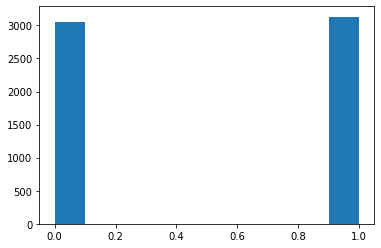

In [ ]:
plt.hist(final_train_label)

###Load pretrained model of MobileNetV2

In [ ]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
feature_extractor, input_shape = (224,224,3), trainable = False)  

###Add some custom model

In [ ]:
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2,422,210
Trainable params: 164,226
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["acc"]
)

In [ ]:
x_test_scaled=np.array(x_test_scaled)

In [ ]:
print(final_train_image.shape)
print(final_train_label.shape)
print(x_test_scaled.shape)
print(y_test.shape)

(6180, 224, 224, 3)
(6180,)
(934, 224, 224, 3)
(934,)


###Train model on 50 epochs

In [ ]:
hist=model.fit(final_train_image, final_train_label, batch_size= 64,validation_data=(x_test_scaled, y_test), epochs = 50,verbose=2)

Epoch 1/50
97/97 - 35s - loss: 0.5784 - acc: 0.7778 - val_loss: 0.3347 - val_acc: 0.8555 - 35s/epoch - 358ms/step
Epoch 2/50
97/97 - 33s - loss: 0.3434 - acc: 0.8469 - val_loss: 0.3139 - val_acc: 0.8672 - 33s/epoch - 336ms/step
Epoch 3/50
97/97 - 33s - loss: 0.3218 - acc: 0.8581 - val_loss: 0.3549 - val_acc: 0.8405 - 33s/epoch - 335ms/step
Epoch 4/50
97/97 - 33s - loss: 0.2926 - acc: 0.8701 - val_loss: 0.3125 - val_acc: 0.8715 - 33s/epoch - 342ms/step
Epoch 5/50
97/97 - 33s - loss: 0.2855 - acc: 0.8783 - val_loss: 0.2946 - val_acc: 0.8822 - 33s/epoch - 337ms/step
Epoch 6/50
97/97 - 33s - loss: 0.2907 - acc: 0.8725 - val_loss: 0.3057 - val_acc: 0.8790 - 33s/epoch - 339ms/step
Epoch 7/50
97/97 - 31s - loss: 0.2933 - acc: 0.8778 - val_loss: 0.2927 - val_acc: 0.8801 - 31s/epoch - 322ms/step
Epoch 8/50
97/97 - 31s - loss: 0.2676 - acc: 0.8796 - val_loss: 0.2938 - val_acc: 0.8854 - 31s/epoch - 320ms/step
Epoch 9/50
97/97 - 31s - loss: 0.2634 - acc: 0.8867 - val_loss: 0.2992 - val_acc: 0.8865

In [ ]:
loss , acc = model.evaluate(x_test_scaled, y_test, verbose = 2)
print(acc)

30/30 - 5s - loss: 0.3180 - acc: 0.8951 - 5s/epoch - 156ms/step
0.8950749635696411


###Classification report 

In [ ]:
from sklearn.metrics import classification_report
pred = model.predict(x_test_scaled, batch_size=128, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(y_test,predicted)
print(report)

8/8 [==============================] - 4s 455ms/step
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       534
           1       0.96      0.79      0.87       400

    accuracy                           0.90       934
   macro avg       0.91      0.88      0.89       934
weighted avg       0.90      0.90      0.89       934



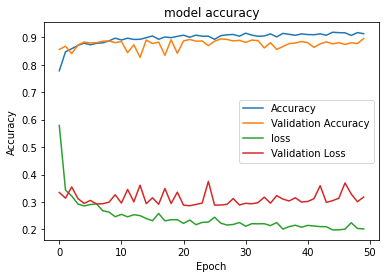

In [ ]:
#visualize training and testing data 
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

##Save model for future use 

In [ ]:
!mkdir -p saved_model
model.save('/content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/saved_model/my_model_bath64(dropout(0.2)-equal_data')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/saved_model/my_model_bath64(dropout(0.2)-equal_data/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Defect_Anomaly_CV_IITJ/Images_PrithviAI/saved_model/my_model_bath64(dropout(0.2)-equal_data/assets
